In [162]:
# Phutharesuan Wachirapisut
# 651610348
# Project 204102
# 204102 sec 005

# Bank Marketing Project

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [164]:
df = pd.read_csv("Bank_Marketing_attribute.csv",index_col="Unnamed: 0")
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [165]:
bank_class = pd.read_csv("Bank_Marketing_class.csv",index_col='Unnamed: 0')
bank_class

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [166]:
df["class"] = bank_class["y"]
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,class
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  class        45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


Clean Data โดยการตัด Row ที่มี Missing Value

In [168]:
df.isnull().any()

age            False
job             True
marital        False
education       True
default        False
balance        False
housing        False
loan           False
contact         True
day_of_week    False
month          False
duration       False
campaign       False
pdays          False
previous       False
poutcome        True
class          False
dtype: bool

In [169]:
df = df.loc[(df["job"].notnull()) &
            (df["education"].notnull()) &
            (df["contact"].notnull()) &
            (df["poutcome"].notnull())]

In [170]:
df.isnull().any()

age            False
job            False
marital        False
education      False
default        False
balance        False
housing        False
loan           False
contact        False
day_of_week    False
month          False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
class          False
dtype: bool

In [171]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,class
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [172]:
df["balance class"] = df.balance.apply(lambda x: "High" if x > df.balance.mean() else "Low" if x < df.balance.mean() else "Normal")
df

/var/folders/7t/3b3ftw4173nfsbh_5d5nj6mh0000gn/T/ipykernel_11059/4087241084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balance class"] = df.balance.apply(lambda x: "High" if x > df.balance.mean() else "Low" if x < df.balance.mean() else "Normal")


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,class,balance class
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,Low
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes,Low
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,High
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,High
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no,Low
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,Low
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,High
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,High


In [173]:
bank_df = df.reindex(columns=["job", "marital", "education", "default", "housing", "loan", "balance class","class"])
bank_df

,job,marital,education,default,housing,loan,balance class,class
24060,admin.,married,tertiary,no,no,no,Low,no
24062,admin.,single,secondary,no,yes,yes,Low,yes
24064,services,married,secondary,no,yes,no,High,yes
24072,management,married,tertiary,no,yes,no,High,no
24077,management,married,tertiary,no,yes,no,Low,yes
...,...,...,...,...,...,...,...,...
45199,blue-collar,single,secondary,no,yes,no,Low,no
45201,management,married,tertiary,no,no,no,Low,yes
45204,retired,married,secondary,no,no,no,High,yes
45208,retired,married,secondary,no,no,no,High,yes


In [174]:
bank_df["housing"] = bank_df["housing"].apply(lambda x: "H:No" if x == "no" else "H:Yes")
bank_df["default"] = bank_df["default"].apply(lambda x: "D:No" if x == "no" else "D:Yes")
bank_df["loan"] = bank_df["loan"].apply(lambda x: "L:No" if x == "no" else "L:Yes")

In [175]:
bank_df

,job,marital,education,default,housing,loan,balance class,class
24060,admin.,married,tertiary,D:No,H:No,L:No,Low,no
24062,admin.,single,secondary,D:No,H:Yes,L:Yes,Low,yes
24064,services,married,secondary,D:No,H:Yes,L:No,High,yes
24072,management,married,tertiary,D:No,H:Yes,L:No,High,no
24077,management,married,tertiary,D:No,H:Yes,L:No,Low,yes
...,...,...,...,...,...,...,...,...
45199,blue-collar,single,secondary,D:No,H:Yes,L:No,Low,no
45201,management,married,tertiary,D:No,H:No,L:No,Low,yes
45204,retired,married,secondary,D:No,H:No,L:No,High,yes
45208,retired,married,secondary,D:No,H:No,L:No,High,yes


In [176]:
import copy
b_attri = copy.deepcopy(bank_df)
b_attri = b_attri.drop(["class"],axis=1)
list_ = "job, marital, education, default, housing, loan, balance class".split(", ")
for i in list_:
	one_hot_ = pd.get_dummies(b_attri[i], prefix='', prefix_sep='',dtype=int)
	b_attri = b_attri.join([one_hot_])

b_attri = b_attri.drop(list_,axis = 1)
b_attri

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,secondary,tertiary,D:No,D:Yes,H:No,H:Yes,L:No,L:Yes,High,Low
24060,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
24062,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
24064,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
24072,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
24077,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1
45201,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
45204,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
45208,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [177]:
b_class = copy.deepcopy(bank_df)
b_class = b_class.reindex(["class"],axis=1)
b_class

,class
24060,no
24062,yes
24064,yes
24072,no
24077,yes
...,...
45199,no
45201,yes
45204,yes
45208,yes


input: Latitude, Longitude

output: Primary Type

In [178]:
x_train, x_test, y_train, y_test = train_test_split(b_attri, b_class, test_size=0.7)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN: 0.760109 
Tree: 0.755191 
Naive Bayes: 0.632787 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


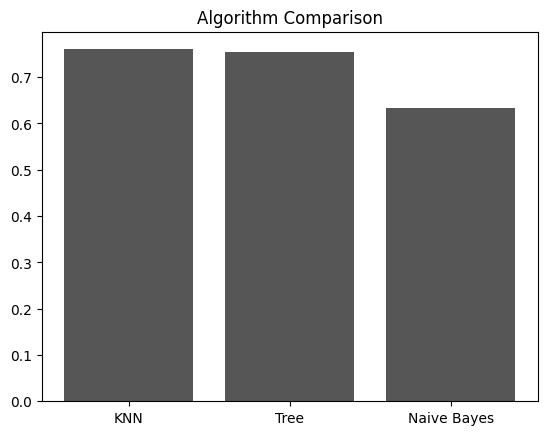

In [179]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
nn = 6
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors= nn)))
models.append(('Tree', DecisionTreeClassifier()))
models.append(("Naive Bayes", GaussianNB()))

# evaluate each model in turn
results = []
names = []
accuracy_dict = {}
scoring = 'accuracy'

for name, clf in models:
  model = clf
  model.fit(x_train,y_train)
  Predited_class = model.predict(x_test)
  accuracy = accuracy_score(y_test, Predited_class)
  results.append(accuracy)
  names.append(name)
  accuracy_dict[f"{names}"] = accuracy
  msg = "%s: %f " % (name, accuracy)
  print(msg)

# boxplot algorithm comparison
# fig = plt.figure()
# 
# 
fig, ax = plt.subplots()

ax.bar(names,results, color="#565656")
plt.title('Algorithm Comparison')
plt.show()

In [180]:
model = KNeighborsClassifier(n_neighbors= nn)
model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [181]:
x_test

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,secondary,tertiary,D:No,D:Yes,H:No,H:Yes,L:No,L:Yes,High,Low
34011,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
26237,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
36618,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
37683,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
27605,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35230,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
39307,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,1,0
41348,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
27897,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1


In [182]:
results = x_test
results["Predict"] = model.predict(x_test)

In [183]:
results

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,tertiary,D:No,D:Yes,H:No,H:Yes,L:No,L:Yes,High,Low,Predict
34011,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,no
26237,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,no
36618,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,no
37683,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,no
27605,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,0,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35230,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,no
39307,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,1,0,no
41348,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,no
27897,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,no


In [184]:
accuracy_score(y_test, results["Predict"])

0.7601092896174864

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results["Predict"])
cm

array([[3954,  280],
       [1037,  219]])

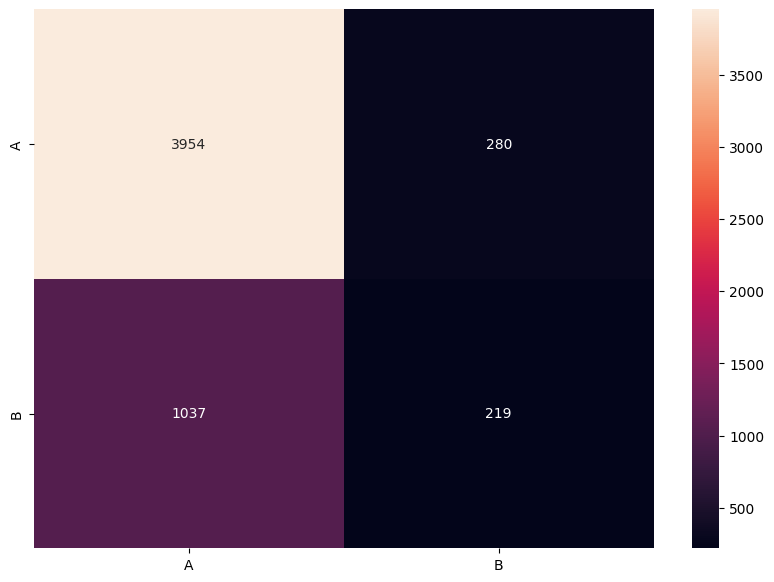

In [186]:
import seaborn as sn
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm,
                     index = [i for i in "AB"],
                     columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

plt.show()

In [187]:
from sklearn.metrics import classification_report
print (classification_report(y_test, results["Predict"]))

              precision    recall  f1-score   support

          no       0.79      0.93      0.86      4234
         yes       0.44      0.17      0.25      1256

    accuracy                           0.76      5490
   macro avg       0.62      0.55      0.55      5490
weighted avg       0.71      0.76      0.72      5490



In [188]:
job = "retired" #@param ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']
marital = "married" #@param ['divorced', 'married', 'single']
education = "secondary" #@param ['primary', 'secondary', 'tertiary']
default = "yes" #@param ['yes', 'no']
housing = "no" #@param ['yes', 'no']
loan = "no" #@param ['yes', 'no']
balance_class = "Low" #@param ['High', 'Low', "Normal"]


In [189]:
job = [job]
marital = [marital]
education = [education]
default = [default]
housing = [housing]
loan = [loan]
balance_class = [balance_class]

data = {
    "job": job,
    "marital": marital,
    "education": education,
    "default": default,
    "housing": housing,
    "loan": loan,
    "balance class": balance_class
}

TestingData = pd.DataFrame(data)
TestingData["housing"] = TestingData["housing"].apply(lambda x: "H:No" if x == "no" else "H:Yes")
TestingData["default"] = TestingData["default"].apply(lambda x: "D:No" if x == "no" else "D:Yes")
TestingData["loan"] = TestingData["loan"].apply(lambda x: "L:No" if x == "no" else "L:Yes")

TestingData

,job,marital,education,default,housing,loan,balance class
0,retired,married,secondary,D:Yes,H:No,L:No,Low


In [190]:
list_ = "job, marital, education, default, housing, loan, balance class".split(", ")
for i in list_:
	one_hot_ = pd.get_dummies(TestingData[i], prefix='', prefix_sep='',dtype=int)
	TestingData = TestingData.join([one_hot_])

TestingData = TestingData.drop(list_,axis = 1)
TestingData


,retired,married,secondary,D:Yes,H:No,L:No,Low
0,1,1,1,1,1,1,1


In [191]:
missing_columns_nonmiss = set(x_train.columns) - set(TestingData.columns)
for j in missing_columns_nonmiss:
    TestingData[j] = 0

missing_columns_miss = set(TestingData.columns) - set(x_train.columns)
for j in missing_columns_miss:
    x_train[j] = 0

TestingData = TestingData.reindex(x_train.columns, axis=1)
TestingData

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,secondary,tertiary,D:No,D:Yes,H:No,H:Yes,L:No,L:Yes,High,Low
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1


In [192]:
prediction = model.predict(TestingData)
print(prediction)

['no']
